---
## _Task 2: IMPLEMENT NON-LINEAR REGRESSION(China GDP)_
## _Author: SANDHYA S_
### _Problem Statement:_
#### * _Plot Graph between Year and GDP value for given dataset._
#### * _This is a non-linear regression task as it involves just 2 variables._
### _Dataset: https://bit.ly/2VbSEzN_
---

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
data = pd.read_csv('china_gdp.csv')
data.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [3]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [4]:
# Data description
data.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


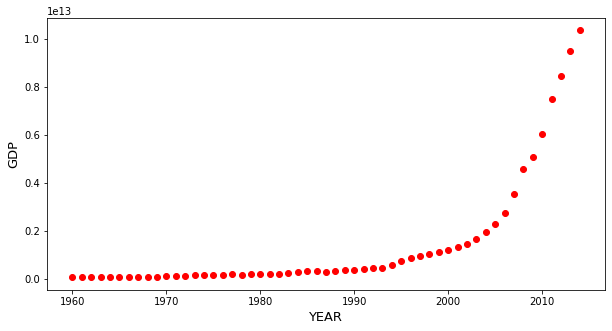

In [5]:
# Plotting the dataset
plt.figure(figsize=(10, 5))
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('GDP', fontsize=13)
plt.plot(data.Year, data.Value, 'ro')
plt.show()

# _Logistic Regression_

In [6]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

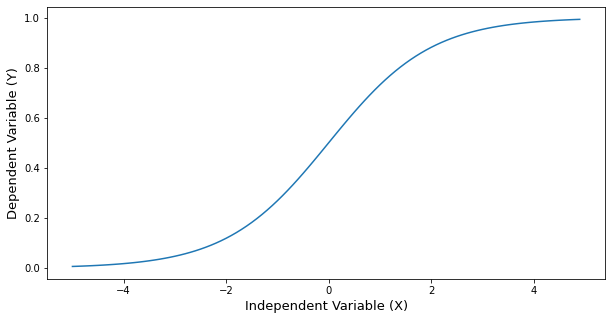

In [7]:
plt.figure(figsize=(10, 5)) 
plt.xlabel('Independent Variable (X)', fontsize=13)
plt.ylabel('Dependent Variable (Y)', fontsize=13)
plt.plot(X, Y)
plt.show()

## * _Building the Model_

In [8]:
def sigmoid(x, Beta1, Beta2):
    y = 1 / (1 + np.exp(-Beta1*(x-Beta2)))
    return y

In [9]:
beta1 = 0.10
beta2 = 1990.0

In [10]:
# logistic function
y_pred = sigmoid(data.Year, beta1, beta2)

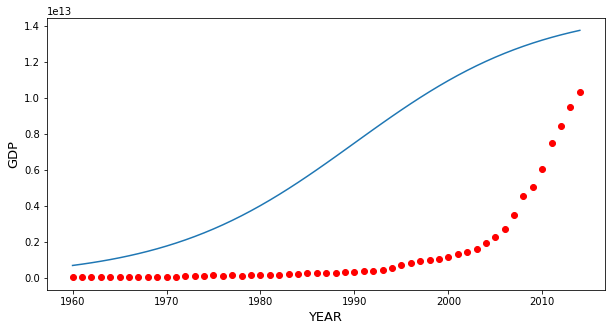

In [11]:
# plotting the initial prediction against datapoints
plt.figure(figsize=(10, 5)) 
plt.plot(data.Year, y_pred*15000000000000.)
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('GDP', fontsize=13)
plt.plot(data.Year, data.Value, 'ro')
plt.show()

## * _Best parameters for the fit line_

In [12]:
# Normalizing data
x_data = data.Year / max(data.Year)
y_data = data.Value / max(data.Value)

In [13]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x_data, y_data)

In [14]:
# Final parameters
print(f'Beta 1:{popt[0]}, Beta 2:{popt[1]}')

Beta 1:690.4517111155185, Beta 2:0.9972071272529599


In [15]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
y = sigmoid(x, *popt)

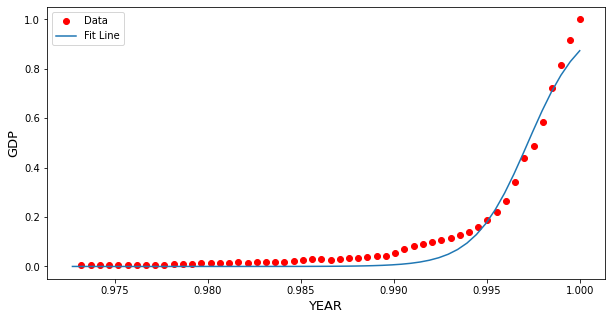

In [16]:
# Plotting Logistic Regression Line
plt.figure(figsize=(10, 5)) 
plt.plot(x_data, y_data, 'ro', label='Data')
plt.plot(x, y, label='Fit Line')
plt.legend(loc='best')
plt.xlabel('YEAR', fontsize=13)
plt.ylabel('GDP', fontsize=13)
plt.show()

## * _Making Prediction_

In [17]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
# Splitting data into training and testing set
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2)

In [19]:
print(f'train_x: {train_x.shape}, train_y: {train_y.shape}')
print(f'test_x: {test_x.shape}, test_y: {test_y.shape}')

train_x: (44,), train_y: (44,)
test_x: (11,), test_y: (11,)


In [20]:
# Building the model and making prediction
popt, pcov = curve_fit(sigmoid, train_x, train_y)
pred = sigmoid(test_x, *popt)

## * _Model Evaluation_

In [21]:
print(f'Mean Absolute Error: {mean_absolute_error(pred, test_y)}')
print(f'R2-score: {r2_score(pred, test_y)}')

Mean Absolute Error: 0.02214363909556352
R2-score: 0.9795382252242205


---
## _Thank You!_